In [1]:
import utils
import models
import os 
import cv2
import random
import matplotlib.pyplot as plt 
import numpy as np 
import keras.backend as K
import keras.losses as KL
import tensorflow as tf 
from tensorflow.keras.optimizers import Adam




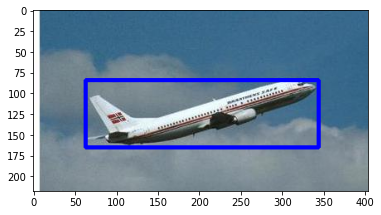

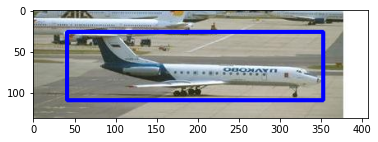

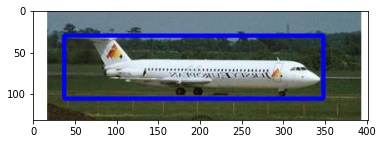

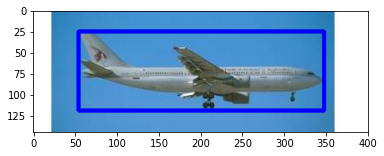

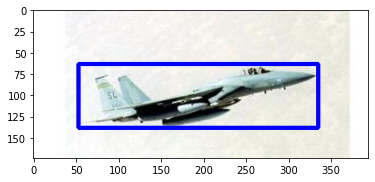

In [2]:
IMAGE_DIR = ['D:\\projects\\datasets\\Caltech101\\101_ObjectCategories\\accordion','D:\\projects\\datasets\\Caltech101\\101_ObjectCategories\\airplanes']
ANNOTATION_DIR = ['D:\\projects\\datasets\\Caltech101\\Annotations\\accordion', 'D:\\projects\\datasets\\Caltech101\\Annotations\\Airplanes_Side_2']
utils.check_dataset(IMAGE_DIR[1], ANNOTATION_DIR[1], num_check=5, shuffle=True)


In [3]:
IMAGE_DIR = 'D:\\projects\\datasets\\bbox_regression\\images'
ANNOTATION_DIR = 'D:\\projects\\datasets\\bbox_regression\\annotations'
x_data, y_data = utils.load_dataset(IMAGE_DIR, ANNOTATION_DIR, dsize=(224, 224))
class_names = utils.load_class_names(IMAGE_DIR)

       ]
one hot =  [0. 0. 1. 0.]
image path      =  D:\projects\datasets\bbox_regression\images\anchor\image_0016.jpg
annotation path =  D:\projects\datasets\bbox_regression\annotations\anchor\annotation_0016.mat
image: height, width =  300 265
bbox    =  [0.04528302 0.08       0.94339623 0.91333333]
one hot =  [0. 0. 1. 0.]
image path      =  D:\projects\datasets\bbox_regression\images\anchor\image_0017.jpg
annotation path =  D:\projects\datasets\bbox_regression\annotations\anchor\annotation_0017.mat
image: height, width =  257 300
bbox    =  [0.01666667 0.0155642  0.98       0.99610895]
one hot =  [0. 0. 1. 0.]
image path      =  D:\projects\datasets\bbox_regression\images\anchor\image_0018.jpg
annotation path =  D:\projects\datasets\bbox_regression\annotations\anchor\annotation_0018.mat
image: height, width =  232 300
bbox    =  [0.08       0.07758621 0.92666667 0.93534483]
one hot =  [0. 0. 1. 0.]
image path      =  D:\projects\datasets\bbox_regression\images\anchor\image_0019.jpg

In [4]:
print('x data shape = {0}, data type = {1}'.format(x_data.shape, x_data.dtype))
print('y data shape = {0}, data type = {1}'.format(y_data.shape, y_data.dtype))

x_data, y_data = utils.shuffle_data(x_data, y_data)

num_data = len(x_data)
num_train = int(num_data * 0.7)
num_val = int(num_data * 0.2)
num_test = num_data - num_train - num_val

x_train = x_data[:num_train]
y_train = y_data[:num_train]
x_val = x_data[num_train:num_train + num_val]
y_val = y_data[num_train:num_train + num_val]
x_test = x_data[num_train + num_val:]
y_test = y_data[num_train + num_val:]

x data shape = (189, 224, 224, 3), data type = float32
y data shape = (189, 8), data type = float32


In [6]:
model = models.build_model(len(class_names))

In [7]:

def loss(y_true, y_pred):
    xy_loss = K.sum(K.square(y_true[:,:2] - y_pred[:,:2]))
    wh_loss = K.sum(K.square(K.pow(y_true[:,2:3], 0.5) - K.pow(y_pred[:,2:3],0.5)) + K.square(K.pow(y_true[:,3:4], 0.5) - K.pow(y_pred[:,3:4],0.5)))   
    class_loss = K.sum(K.square(y_true[:,4:] - y_pred[:,4:]))
    return xy_loss + wh_loss + class_loss


opt = Adam(lr=1e-4)
model.compile(loss=loss, optimizer=opt, metrics=['acc'])
print(model.summary())

H = model.fit(x_train, y_train.astype('float32'),
	validation_data=(x_val, y_val.astype('float32')),
	batch_size= 4,
	epochs=200,
    verbose=1)

 - 0s 13ms/step - loss: 0.0177 - acc: 0.4798 - val_loss: 0.1620 - val_acc: 0.2973
Epoch 52/200
33/33 [==============================] - 0s 13ms/step - loss: 0.0240 - acc: 0.4917 - val_loss: 0.1480 - val_acc: 0.3514
Epoch 53/200
33/33 [==============================] - 0s 14ms/step - loss: 0.0195 - acc: 0.5292 - val_loss: 0.1566 - val_acc: 0.4054
Epoch 54/200
33/33 [==============================] - 0s 14ms/step - loss: 0.0272 - acc: 0.5488 - val_loss: 0.1540 - val_acc: 0.3243
Epoch 55/200
33/33 [==============================] - 0s 13ms/step - loss: 0.0305 - acc: 0.5420 - val_loss: 0.1842 - val_acc: 0.2973
Epoch 56/200
33/33 [==============================] - 0s 13ms/step - loss: 0.0237 - acc: 0.5225 - val_loss: 0.1463 - val_acc: 0.3784
Epoch 57/200
33/33 [==============================] - 0s 13ms/step - loss: 0.0314 - acc: 0.5056 - val_loss: 0.1578 - val_acc: 0.3784
Epoch 58/200
33/33 [==============================] - 0s 13ms/step - loss: 0.0207 - acc: 0.4830 - val_loss: 0.1758 - val

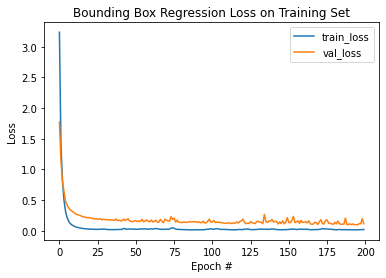

In [8]:
N = len(H.history['loss'])
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Bounding Box Regression Loss on Training Set")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="upper right")

In [9]:
model.evaluate(x_test,y_test)
predict = model.predict(x_test)


1/1 [==============================] - 3s 3s/step - loss: 1.7142 - acc: 0.4500


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


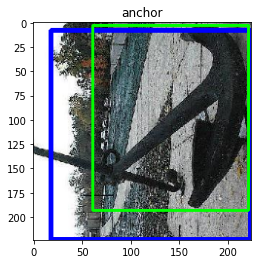

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


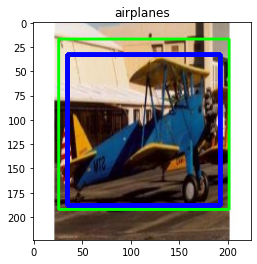

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


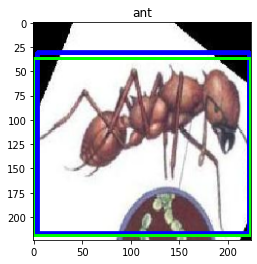

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


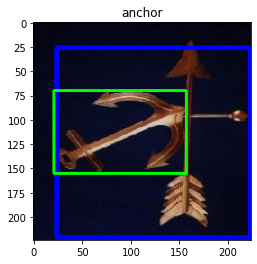

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


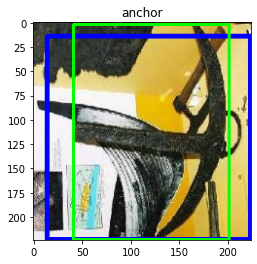

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


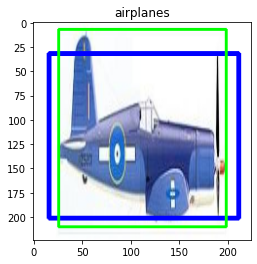

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


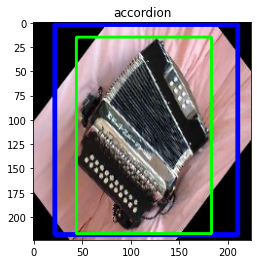

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


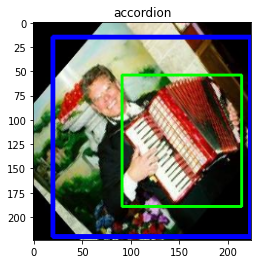

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


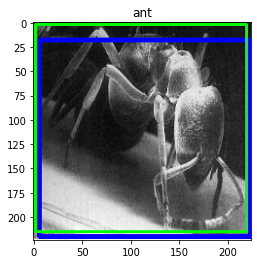

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


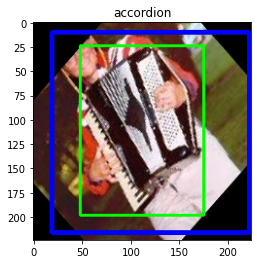

In [11]:

indices = random.sample(range(len(x_test)), 10)

for index in indices:
    img = x_test[index].copy()
    pr = predict[index]
    gt = y_test[index, :4]
    label = np.argmax(pr[4:])
    label_name = class_names[label]

    cv2.rectangle(img, (int(pr[0] * 224), int(pr[1] * 224)), (int(pr[2] * 224), int(pr[3] * 224)), (255,0,0), 3 )
    cv2.rectangle(img, (int(gt[0] * 224), int(gt[1] * 224)), (int(gt[2] * 224), int(gt[3] * 224)), (0,255,0), 2 )

    plt.imshow(img[:,:,::-1])    
    plt.title(label_name)
    plt.show()